In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype 
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

In [0]:
nom_column = ["Altitude","Orientation","Pente","Distance_he","Distance_ve","Distance_hr","Ombrage_9","Ombrage_12","Ombrage_15","Distance_hf"]
j = [4,40]
for i in j :
    if(i == 4):
        for x in range(4):
            chaine = "Wilderness_"+str(x+1)
            nom_column.append(chaine)
    if(i == 40):
        for x in range(40):
            chaine = "Type_sol_"+str(x+1)
            nom_column.append(chaine)

In [0]:
dataset  = fetch_covtype()
data = pd.DataFrame(dataset.data,columns=nom_column)
pd.set_option('display.max_columns', None)
data["Classe"]= dataset.target


In [0]:
data.describe()

,Altitude,Orientation,Pente,Distance_he,Distance_ve,Distance_hr,Ombrage_9,Ombrage_12,Ombrage_15,Distance_hf,Wilderness_1,Wilderness_2,Wilderness_3,Wilderness_4,Type_sol_1,Type_sol_2,Type_sol_3,Type_sol_4,Type_sol_5,Type_sol_6,Type_sol_7,Type_sol_8,Type_sol_9,Type_sol_10,Type_sol_11,Type_sol_12,Type_sol_13,Type_sol_14,Type_sol_15,Type_sol_16,Type_sol_17,Type_sol_18,Type_sol_19,Type_sol_20,Type_sol_21,Type_sol_22,Type_sol_23,Type_sol_24,Type_sol_25,Type_sol_26,Type_sol_27,Type_sol_28,Type_sol_29,Type_sol_30,Type_sol_31,Type_sol_32,Type_sol_33,Type_sol_34,Type_sol_35,Type_sol_36,Type_sol_37,Type_sol_38,Type_sol_39,Type_sol_40,Classe
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163

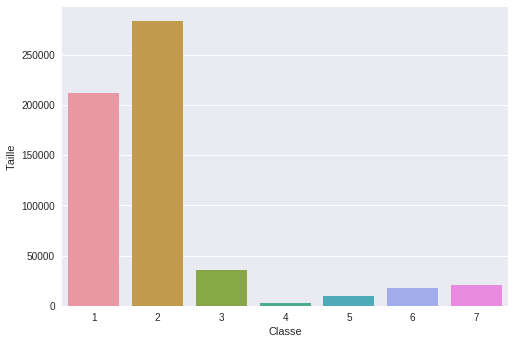

In [0]:
#Voir la taille de chaque classe
classe = data["Classe"].value_counts()
barplot=sns.barplot(classe.index,classe.values.tolist())
barplot.set_xlabel("Classe")
barplot.set_ylabel("Taille")
plt.figure(figsize=(20,10))
plt.show()

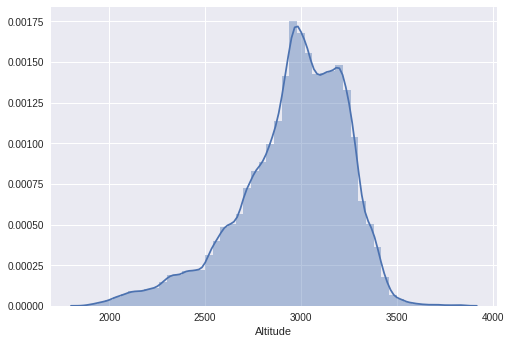

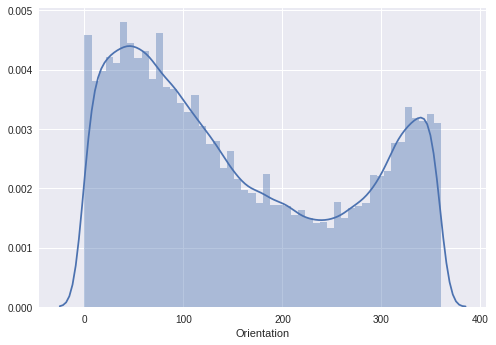

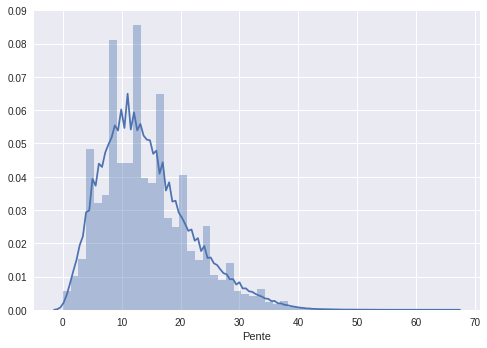

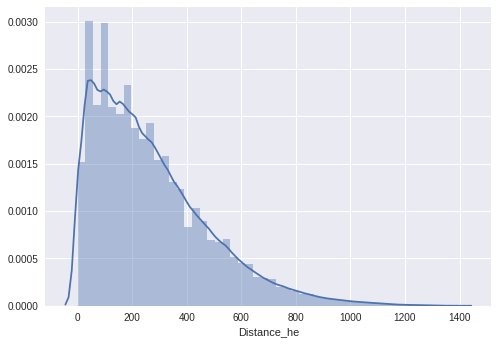

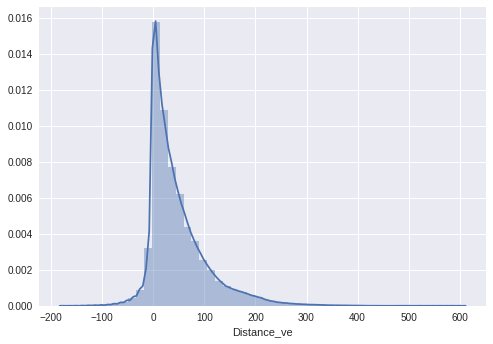

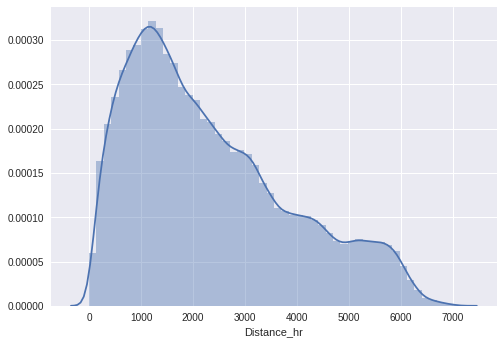

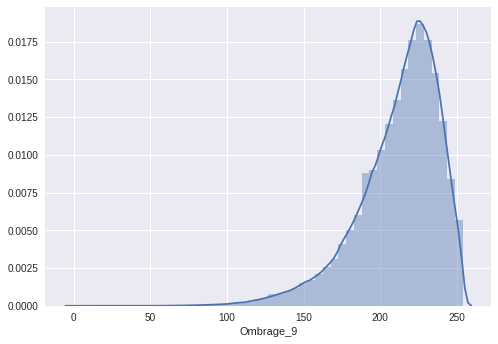

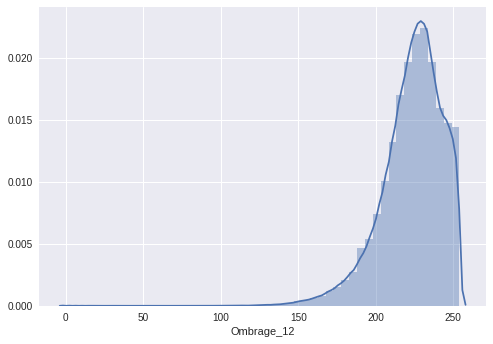

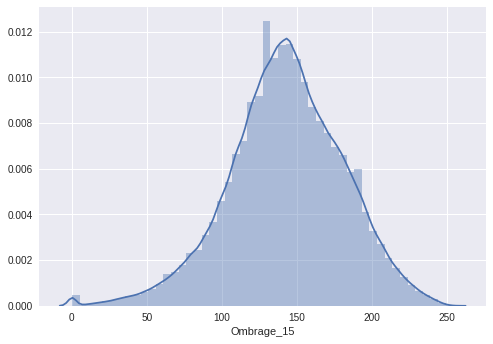

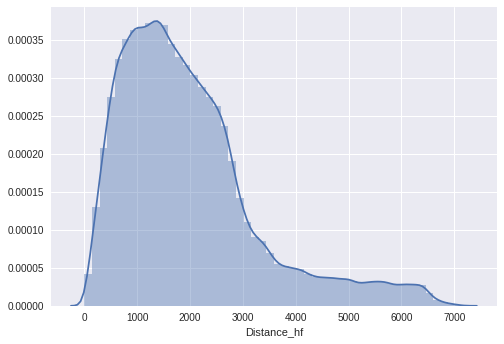

In [0]:
#Plot des distributions des attributs à valeurs entières
for i in range(10):
  dist = sns.distplot(data.iloc[:,i])
  plt.show()


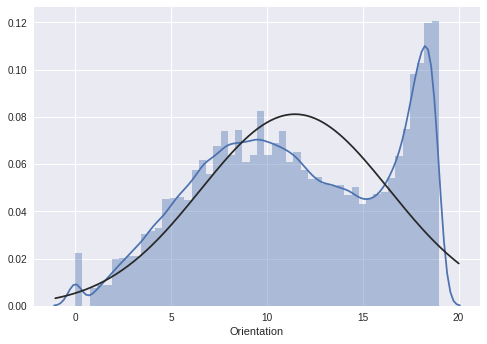

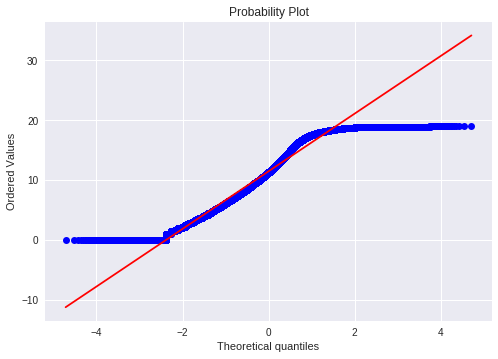

In [0]:
#Normalisation de l'Azimut
dist = sns.distplot(np.sqrt(data.iloc[:,1]),fit=stats.norm)
plt.show()

stats.probplot(np.sqrt(data.iloc[:,1]),plot=plt)
plt.show()


             Altitude  Orientation     Pente  Distance_he  Distance_ve  \
Altitude     1.000000     0.015735 -0.242697     0.306229     0.093306   
Orientation  0.015735     1.000000  0.078728     0.017376     0.070305   
Pente       -0.242697     0.078728  1.000000    -0.010607     0.274976   
Distance_he  0.306229     0.017376 -0.010607     1.000000     0.606236   
Distance_ve  0.093306     0.070305  0.274976     0.606236     1.000000   
Distance_hr  0.365559     0.025121 -0.215914     0.072030    -0.046372   
Ombrage_9    0.112179    -0.579273 -0.327199    -0.027088    -0.166333   
Ombrage_12   0.205887     0.336103 -0.526911     0.046790    -0.110957   
Ombrage_15   0.059148     0.646944 -0.175854     0.052330     0.034902   
Distance_hf  0.148022    -0.109172 -0.185662     0.051874    -0.069913   

             Distance_hr  Ombrage_9  Ombrage_12  Ombrage_15  Distance_hf  
Altitude        0.365559   0.112179    0.205887    0.059148     0.148022  
Orientation     0.025121  -0.579273

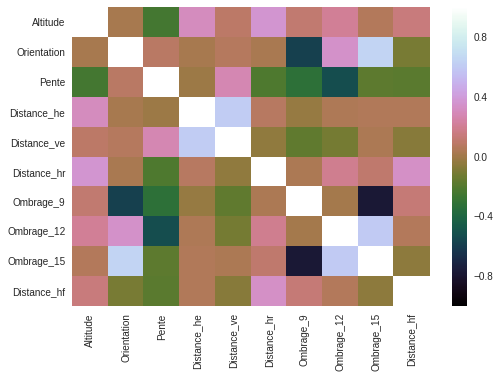

In [0]:
#matrice de corrélation pour détecter liasons entre certaines variables
mat_corr= data.iloc[:,:10].corr(method="pearson")
print(mat_corr)
sns.heatmap(mat_corr,cmap="cubehelix",center=0)
plt.show()

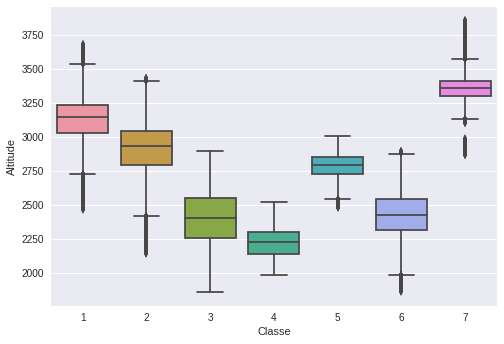

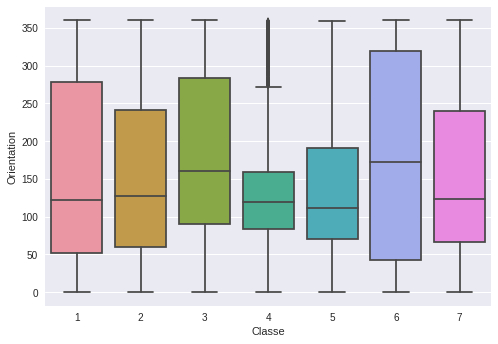

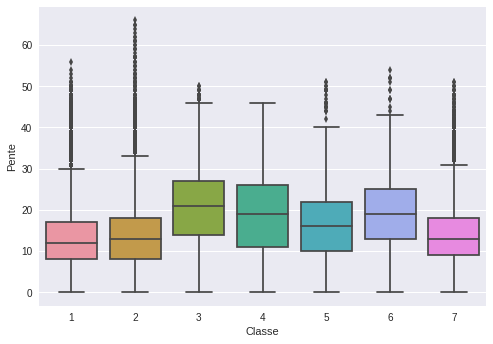

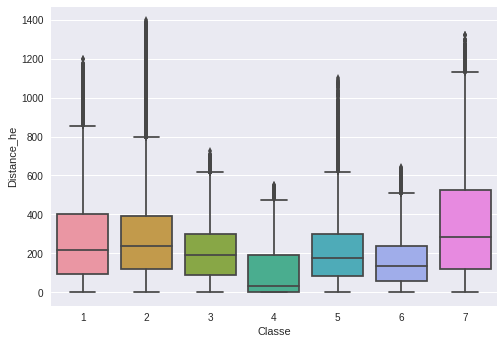

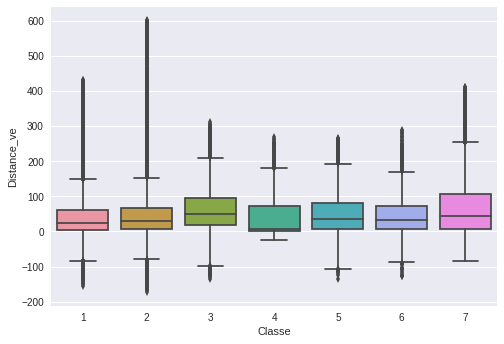

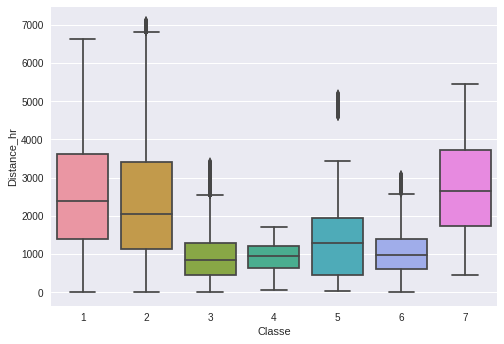

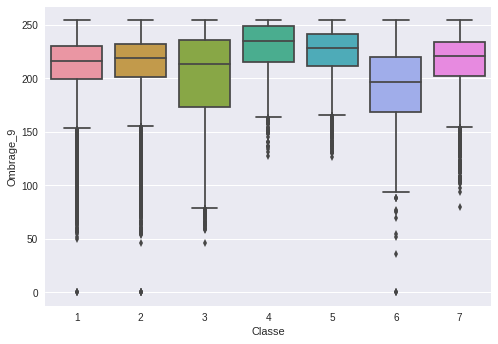

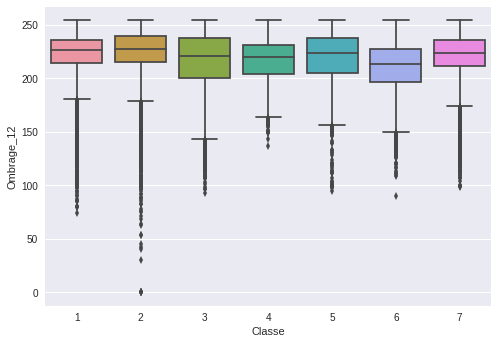

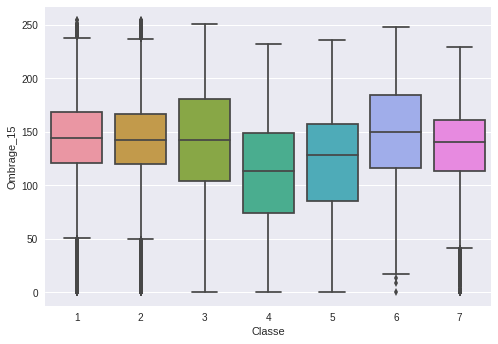

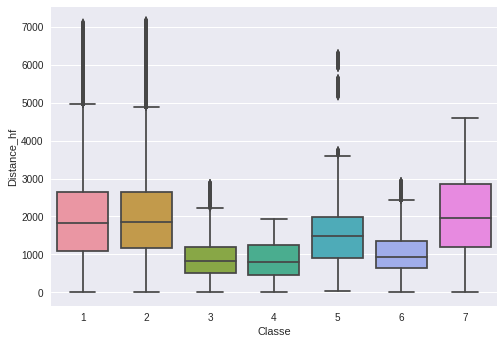

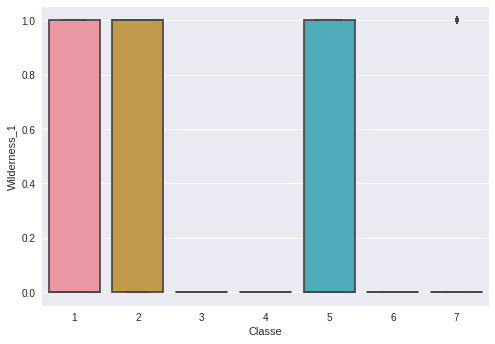

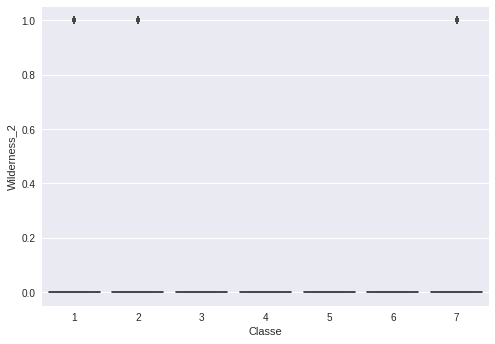

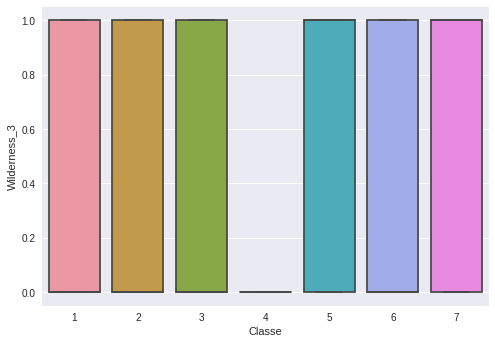

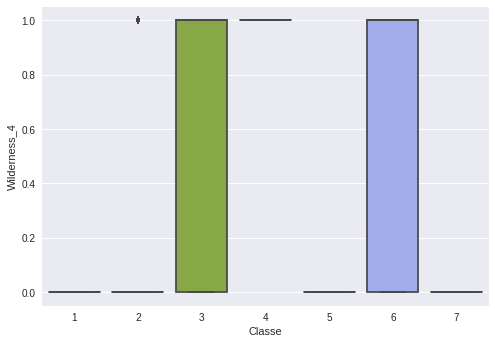

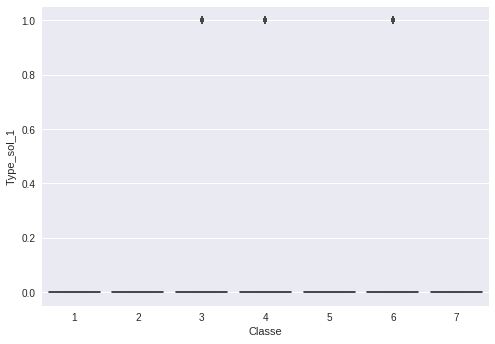

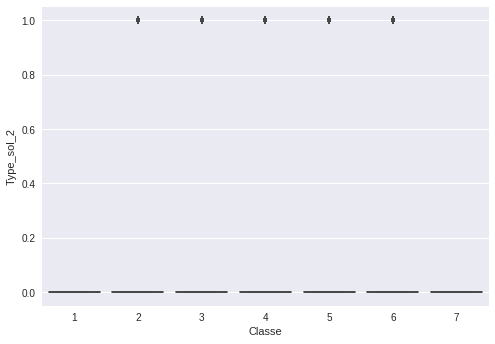

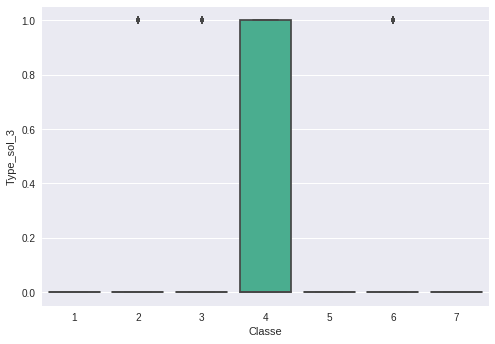

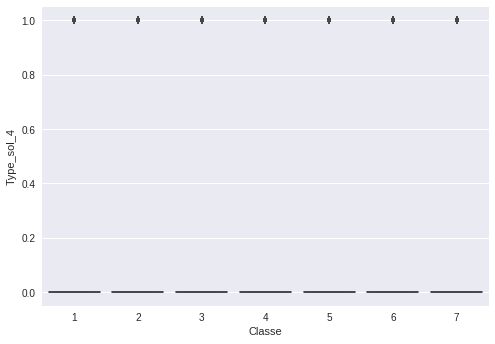

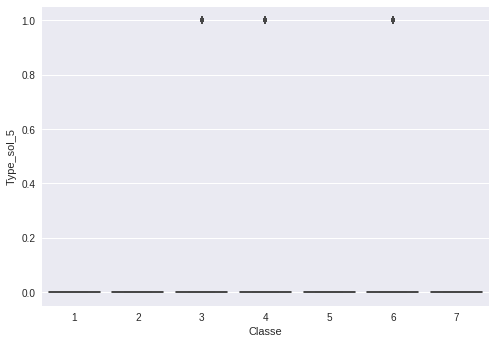

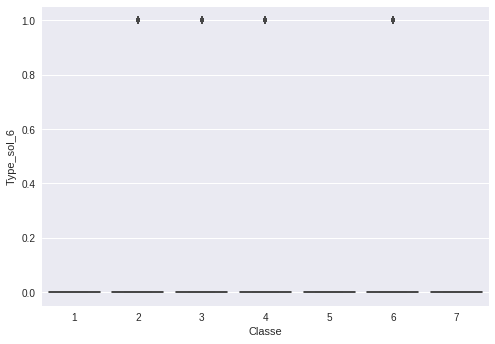

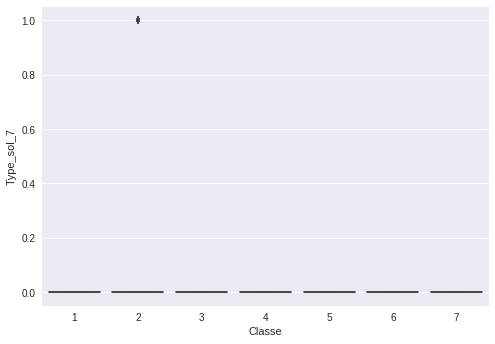

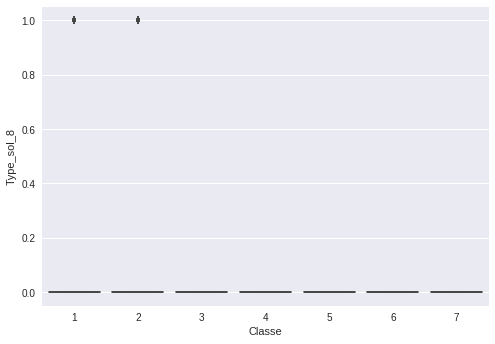

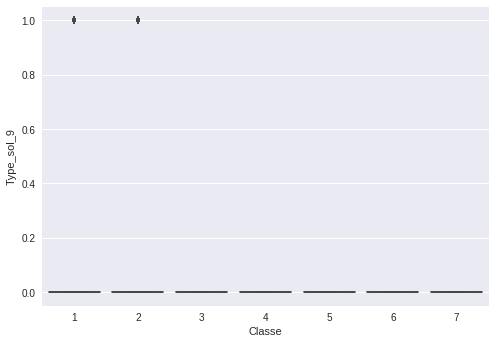

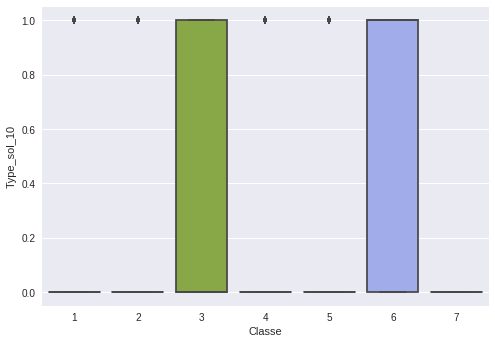

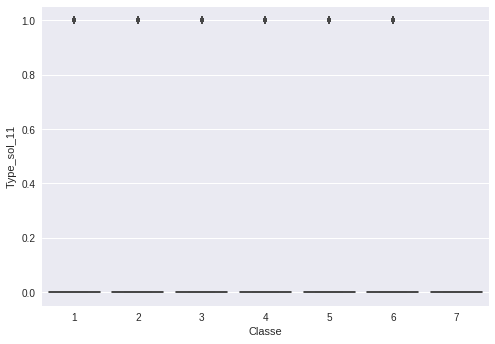

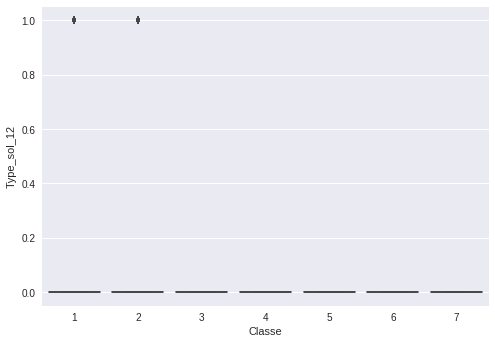

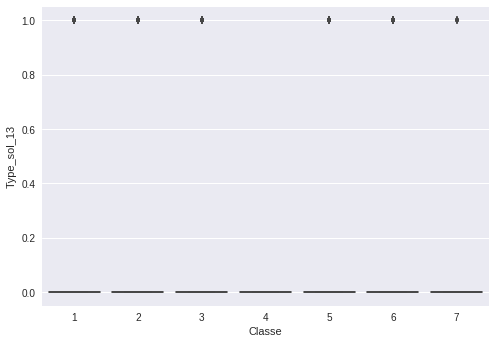

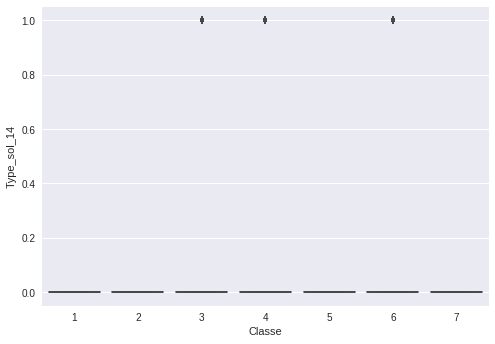

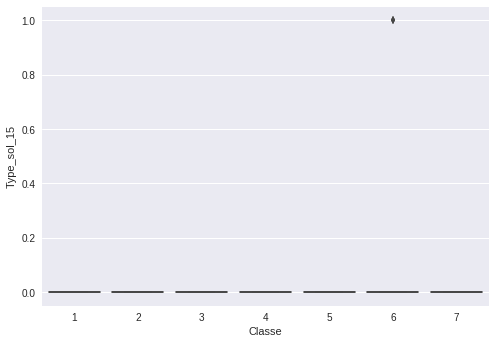

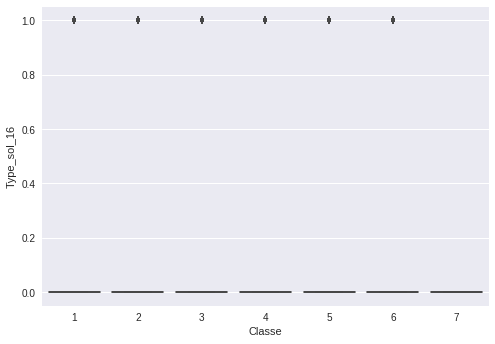

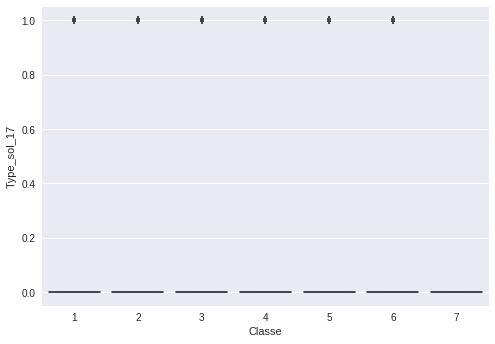

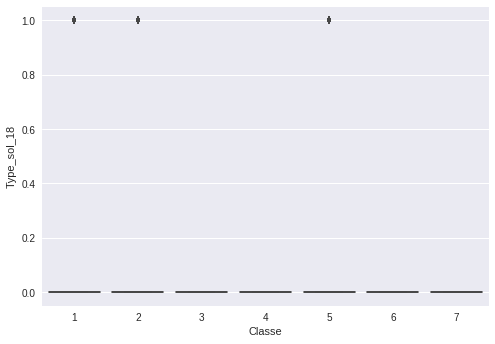

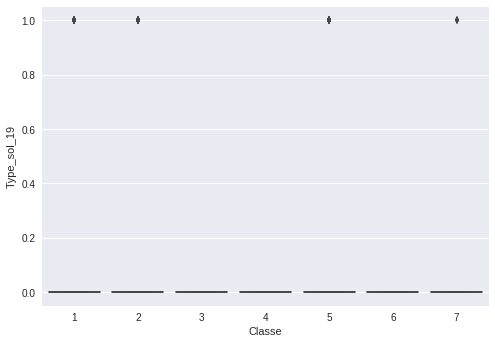

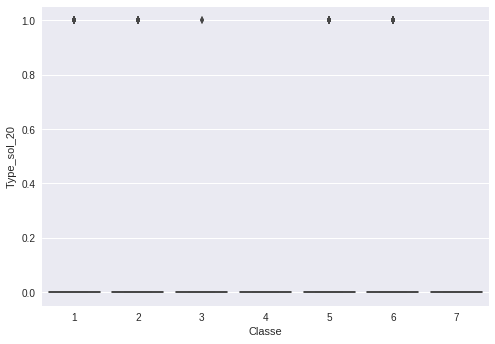

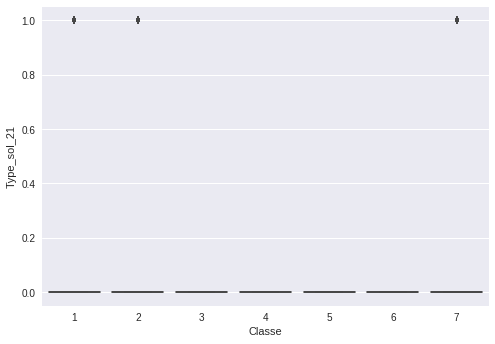

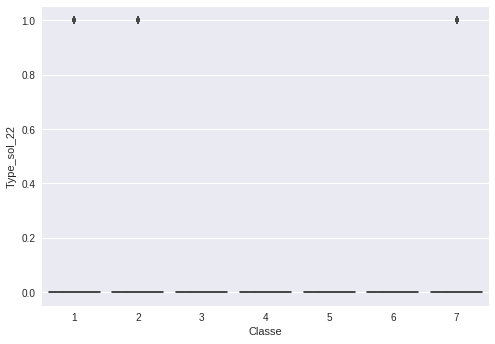

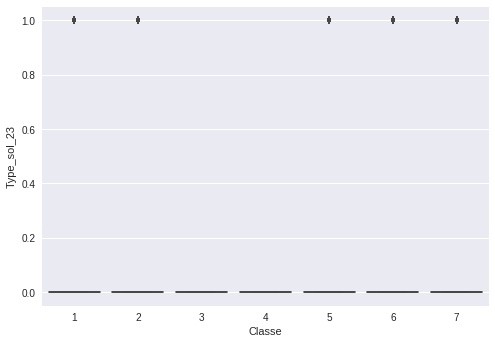

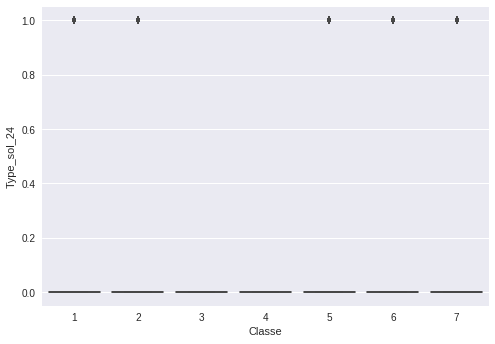

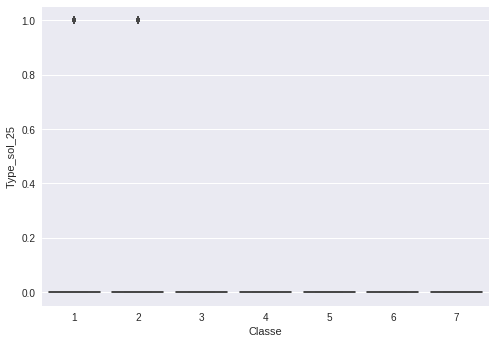

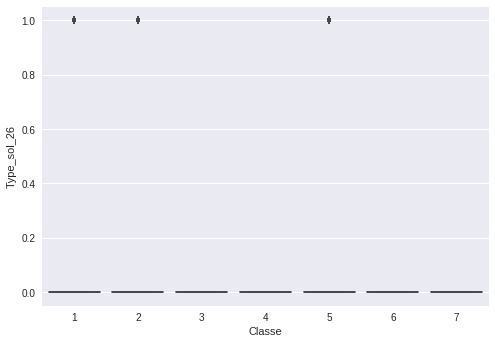

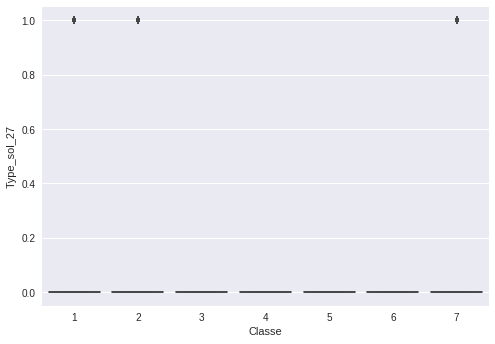

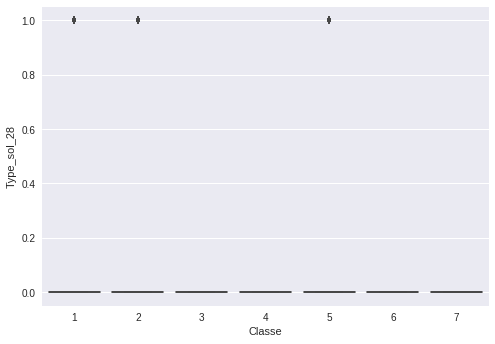

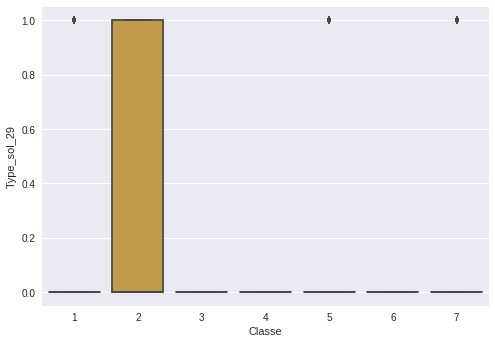

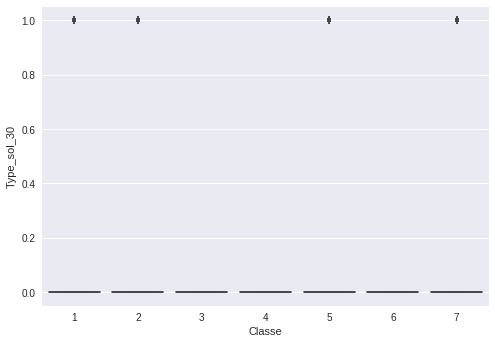

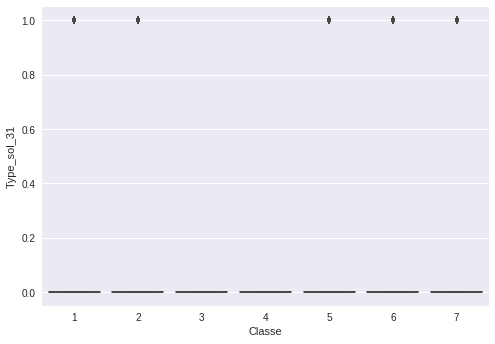

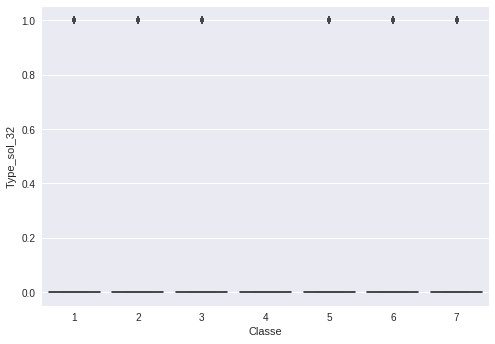

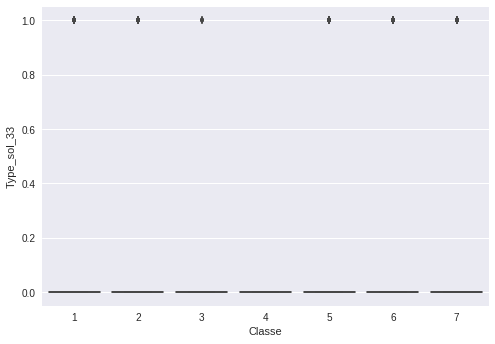

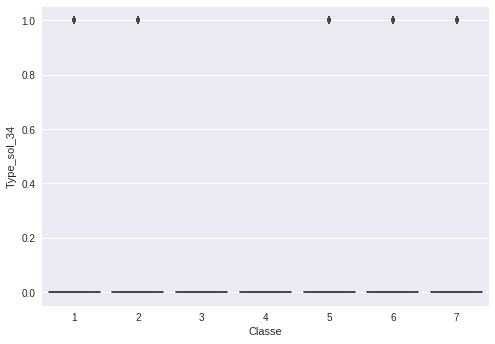

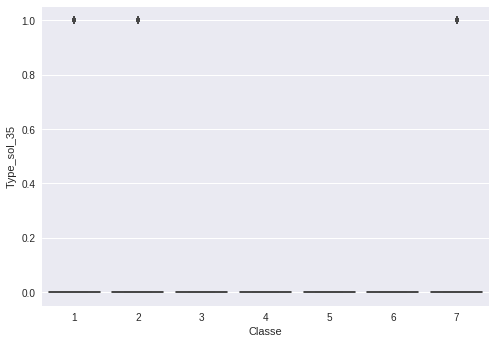

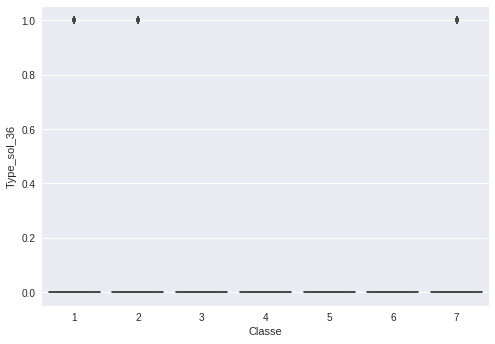

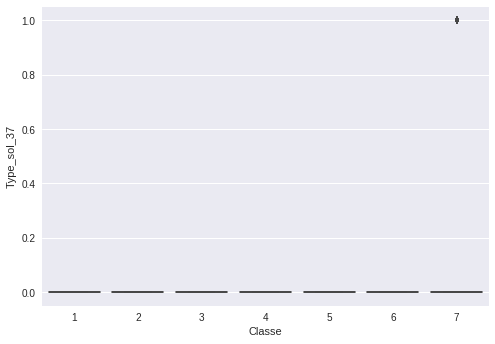

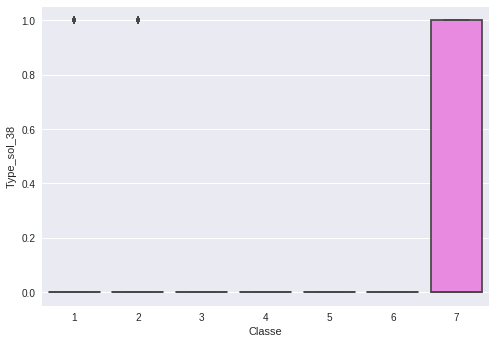

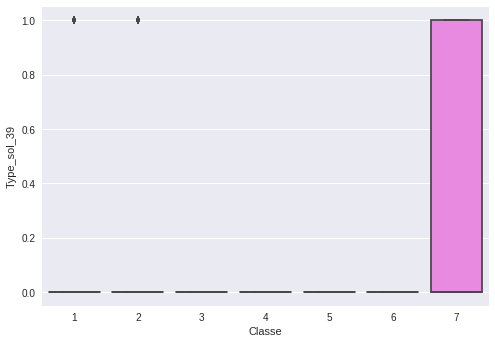

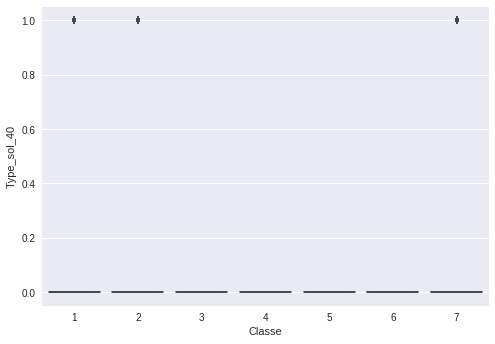

In [0]:
#Boxplot pour voir la distribution des caractéristiques en fonction des classes

variables = data.columns
tmp = len(variables)-1
x = data.Classe
y = variables[0:tmp]

for i in range(0,tmp):
    sns.boxplot(data = data,x=x,y=y[i])
    plt.show()

In [0]:
#Boxplot Altitude, chaque boite a distribution dstincte de l'autre 
#                          -> Caractéristique importante pour prédiction
#Wilderne et Type_sol, certains boxplot montrent qu'il n'y a que certaines classe 
# classes ne présentent pas certaines caractéristiques. -> Distiction de classe
